In [1]:
import numpy as np
import pylab as plt
import seaborn as sns
from scipy.signal import welch
import healpy as hp

In [2]:
time=np.linspace(0, 3600, 20*3600)
fs_hz = 20.0
sigma_K= 0.3 / np.sqrt(20.0)
print(sigma_K)

0.06708203932499368


In [5]:
# April Season
tod_1 = np.load("one_tod/2022041708/43000000.0/043/V0.npz")['arr_0']/1000
wn1 = sigma_K * np.random.normal(0, sigma_K, tod_1.size)
tod_1 = tod_1 + wn1

tod_2 = np.load("one_tod/2022041708/43000000.0/043/G0.npz")['arr_0']/1000
wn2 = sigma_K * np.random.standard_normal(tod_2.size)
tod_2 = tod_2 + wn1

tod_3 = np.load("one_tod/2022041708/43000000.0/043/O0.npz")['arr_0']/1000
wn3 = sigma_K * np.random.standard_normal(tod_3.size)
tod_3 = tod_3 + wn3

tod_4 = np.load("one_tod/2022041708/43000000.0/043/B0.npz")['arr_0']/1000
wn4 = sigma_K * np.random.standard_normal(tod_4.size)
tod_4 = tod_4 + wn4

# Winter season

todw_1 = np.load('one_tod/2022041708/43000000.0/043/V0.npz')['arr_0']/1000
todw_1 = todw_1 + wn1 

todw_2 = np.load('one_tod/2022041708/43000000.0/043/G0.npz')['arr_0']/1000
todw_2 = todw_2 + wn2

todw_3 = np.load('one_tod/2022041708/43000000.0/043/O0.npz')['arr_0']/1000
todw_3 = todw_3 + wn3

todw_4 = np.load('one_tod/2022041708/43000000.0/043/B0.npz')['arr_0']/1000
todw_4 = todw_4 + wn4

In [6]:
def noise_model(f, sigma, f_knee, alpha):
    return sigma * (1+f_knee/f)**alpha

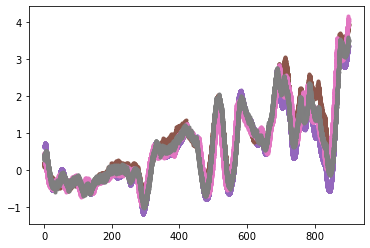

In [8]:
plt.plot(time[0:15*60*20], 0.56*tod_1[0:15*60*20], ',', label="Tod 1")
plt.plot(time[0:15*60*20], 0.56*tod_2[0:15*60*20], ',', label="Tod 2")
plt.plot(time[0:15*60*20], 0.56*tod_3[0:15*60*20], ',', label="Tod 3")
plt.plot(time[0:15*60*20], 0.56*tod_4[0:15*60*20], ',', label="Tod 4")

plt.plot(time[0:15*60*20], 0.56*todw_1[0:15*60*20], '.', label="Tod 1")
plt.plot(time[0:15*60*20], 0.56*todw_2[0:15*60*20], '.', label="Tod 2")
plt.plot(time[0:15*60*20], 0.56*todw_3[0:15*60*20], '.', label="Tod 3")
plt.plot(time[0:15*60*20], 0.56*todw_4[0:15*60*20], '.', label="Tod 4")


In [9]:
freq = np.fft.rfftfreq(tod_1.size, d=1.0/20.0)

f, ps=welch(tod_1, fs=20.0, window='hamming', average='mean', nperseg=2000)

ps1 = np.fft.rfft(tod_1) / noise_model(freq, sigma_K, 0.5, 15/3)
tod_fil = np.fft.irfft(ps1)

ps2 = np.abs(np.fft.rfft(tod_2))**2
ps3 = np.abs(np.fft.rfft(tod_3))**2
ps4 = np.abs(np.fft.rfft(tod_4))**2





ps1w = np.fft.rfft(todw_1) / noise_model(freq, sigma_K, 0.5, 11/3)
ps2w = np.fft.rfft(todw_2)
ps3w = np.fft.rfft(todw_3)
ps4w = np.fft.rfft(todw_4)




<ipython-input-6-241fb4533893>:2: RuntimeWarning: divide by zero encountered in true_divide
  return sigma * (1+f_knee/f)**alpha


/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1e-05, 10000000000.0)

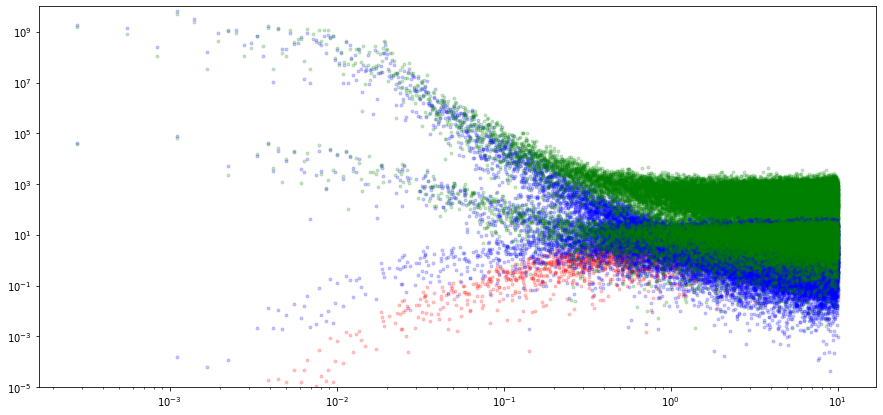

In [10]:
plt.figure(figsize=(15, 7)), 

plt.loglog(freq, ps1, "r.", alpha=0.2)
plt.loglog(freq, ps2, "b.", alpha=0.2)
plt.loglog(freq, ps3, "g.", alpha=0.2)
# plt.loglog(freq, ps4, "k.", alpha=0.2)


plt.loglog(freq, ps1w, "b.", alpha=0.2)
plt.loglog(freq, ps2w, "b.", alpha=0.2)
plt.loglog(freq, ps3w, "g.", alpha=0.2)
# plt.loglog(freq, ps4w, "k.", alpha=0.2)




plt.ylim(0.00001, 1e10)


In [27]:
tod_V3 = np.load("tod_samples/2022041708/43000000.0/043/V3.npz", allow_pickle=True)['arr_0']
tod_B3 = np.load("tod_samples/2022041708/43000000.0/043/B3.npz", allow_pickle=True)['arr_0']
pix_V3 = np.load("tod_samples/2022041708/V3_pix.npz")['arr_0']
pix_B3 = np.load("tod_samples/2022041708/B3_pix.npz")['arr_0']

sky_T = np.load("Sky_Maps/T_map.npy")

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-85-be2c99a5bf60>:45: ComplexWarning: Casting complex values to real discards the imaginary part
  mappa2[j] += i + sky_T[j]


array([-179.26940938+0.0071235j ,    9.82408729-0.00110365j,
         -5.8163638 +0.00022945j, ...,    5.87470239+0.00033888j,
         -9.679679  -0.00101197j,  178.10014872+0.00718923j])

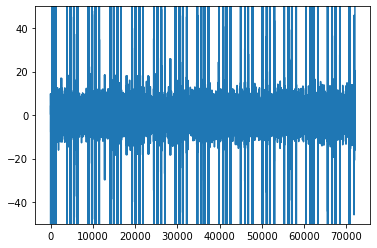

In [85]:
mappa = np.zeros(12*128*128)
tod_so_v3 = np.zeros(len(tod_V3))
tod_v3_full = np.zeros(len(tod_V3))
tod_b3_full = np.zeros(len(tod_B3))
hit   = np.zeros(12*128*128)



    
    
index = 0
for i,j in zip(tod_V3, pix_V3):
    mappa[j] += i + sky_T[j]
    tod_v3_full[index] += i + sky_T[j] 
    tod_so_v3[index] += sky_T[j]
    hit[j] += 1.0
    index += 1

# index = 0
# for i,j in zip(tod_B3, pix_B3):
#     mappa[j] += i + sky_T[j]
#     mappa[j] += sky_T[j]
#     tod_b3_full[index] += i + sky_T[j]
#     hit[j] += 1.0
#     index += 1

tod_f = np.fft.fft(tod_v3_full)
freq=np.linspace(-10, 10, num=72000)

tod_f_c = tod_f / noise_model(freq, 1, 7, 8/3)
tod_denoised = np.fft.ifft(tod_f_c)

# plt.loglog(np.abs(tod_f))
# plt.loglog(np.abs(tod_f_c))
# plt.loglog(noise_model(freq, 8000, 7, 8/3))
# plt.grid()

plt.plot(tod_denoised)
plt.ylim(-50, 50)


mappa2 = np.zeros(12*128*128)
index = 0
for i,j in zip(tod_denoised, pix_V3):
    mappa2[j] += i + sky_T[j]
    hit[j] += 1.0
    index += 1
tod_denoised

<ipython-input-86-5b247139fc97>:1: RuntimeWarning: invalid value encountered in true_divide
  hp.mollview(mappa2/hit, min=-200, max=200, nest=True)
0.0 180.0 -180.0 180.0


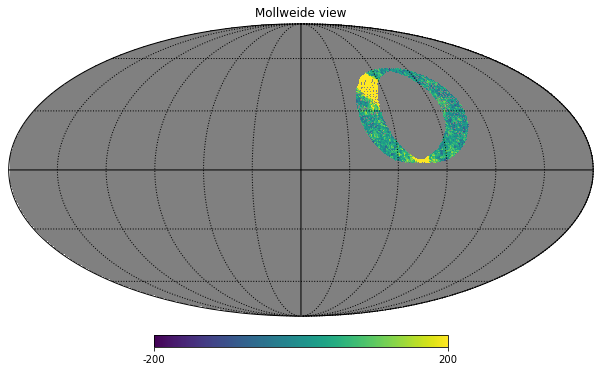

In [86]:
hp.mollview(mappa2/hit, min=-200, max=200, nest=True)
hp.graticule()


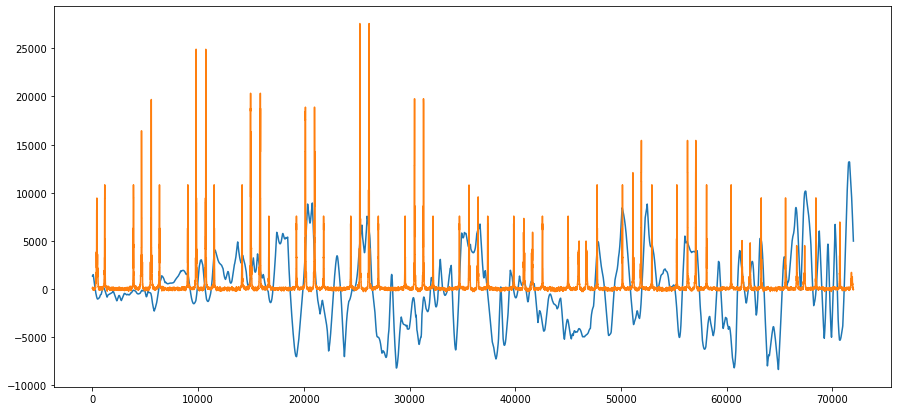

In [20]:
plt.figure(figsize=(15,7))

plt.plot(tod_V3)
plt.plot(tod_so_v3)
#plt.plot(tod_v3_full)

In [21]:
fv3, psv3=welch(tod_v3_full, fs=20.0, window='hamming', average='mean', nperseg=2000)
fb3, psb3=welch(tod_b3_full, fs=20.0, window='hamming', average='mean', nperseg=2000)

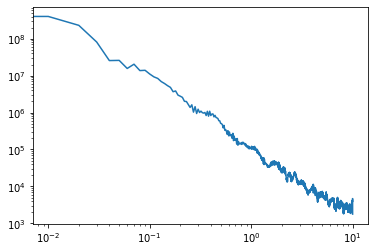

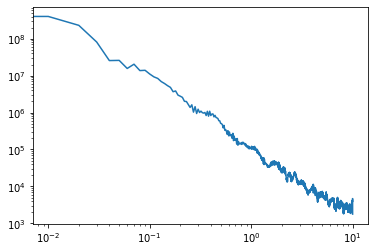

In [24]:
plt.loglog(fv3, psv3)
plt.loglog(fb3, psb3)
plt.figure(2)
plt.loglog(fv3, psv3-psb3)

In [25]:
fv3, psv3=welch(tod_V3, fs=20.0, window='hamming', average='mean', nperseg=2000)
fb3, psb3=welch(tod_B3, fs=20.0, window='hamming', average='mean', nperseg=2000)

In [78]:
def noise_model(f, sigma, f_knee, alpha):
    f = np.array(f)
    noise=sigma * (1+f_knee/(-1.0*f[f<0]))**alpha + 8e8 *np.exp(-f[f<0]**2/(2*0.0002))  
    noise = np.flip(noise)
    noise3=sigma * (1+f_knee/(f[f>0]))**alpha + 8e8 *np.exp(-f[f>0]**2/(2*0.0002))
    noise3=np.flip(noise3)
    noise = np.append(noise, noise3)
    
    
    return noise
# noise_model(freq, 1, 7, 8/3)
# plt.loglog(fv3, psv3)
# plt.loglog(fb3, psb3)
# plt.loglog(fv3, noise_model(fv3, 1, 7, 8/3))


<ipython-input-155-dcecb40ca8ef>:2: RuntimeWarning: invalid value encountered in power
  return sigma * (1+f_knee/f)**alpha + 8e8 *np.exp(-f**2/(2*0.0002))
<ipython-input-169-f7ad4cdbbe63>:3: RuntimeWarning: invalid value encountered in true_divide
  tod_f_c = tod_f / noise_model(freq, 1, 7, 8/3)


In [165]:
np.linspace?